In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
from scipy.spatial.distance import cdist 
 
#Function to implement steps given in previous section
def kmeans(x,k, no_of_iterations=5):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'jaccard') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx][np.argmin(cdist(x[points==idx], x[points==idx] ,'jaccard').sum(axis=0))]
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'jaccard')
        points = np.array([np.argmin(i) for i in distances])
         
    return points,centroids

In [3]:
def kmean_inertia(data,k=5,max_iter=10):
        k_means=kmeans(data,k,max_iter)
        cluster=k_means[0]
        centroids=k_means[1]
        Inertia=0
        for i in range(k):
            cluster_k=data[cluster==i]
            cen_k = centroids[i]
            #clus = cluster[i]
            Inertia+=cdist(cluster_k,[cen_k] ,'jaccard').sum(axis=0)
        return Inertia
                
def optimize(data,m,max_iter=10):
    x = []
    for i in range(1,m):
        x.append(kmean_inertia(data,k=i,max_iter=10))
    return x

In [9]:
enron_txt = pd.read_csv("C:\\Users\\lenovo\\Downloads\\docword.enron.txt", delimiter=" ", names=['DocID', 'WordID', 'Freq'])

In [118]:
enron_txt

,DocID,WordID,Freq
0,1,118,1
1,1,285,1
2,1,1229,1
3,1,1688,1
4,1,2068,1
...,...,...,...
3710415,39861,18448,1
3710416,39861,18848,1
3710417,39861,23449,1
3710418,39861,25721,1


In [15]:
 enron_txt_new = enron_txt.groupby('WordID').sum()

In [106]:
 enron_txt_sort=enron_txt_new.sort_values(by=['Freq'], ascending=False).reset_index() #DocIDs are meaningless here.
 enron_txt_sort

,WordID,DocID,Freq
0,19190,118393361,32985
1,4865,107492542,32115
2,8243,130950127,28024
3,15231,138132900,24910
4,3450,134804537,24456
...,...,...,...
28094,18950,59350,2
28095,18951,35102,2
28096,843,18097,1
28097,14925,11989,1


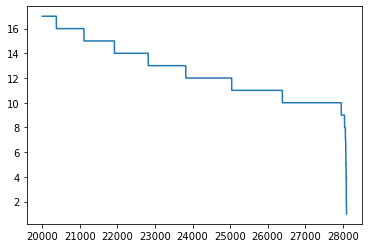

In [107]:
#Words with frequence less than a threshold (right tail of descending array)
l=20000
k=28099
plt.plot(range(l,k),enron_txt_sort["Freq"][l:k])

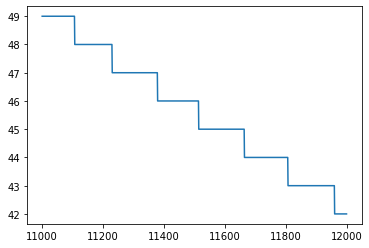

In [108]:
#Words with frequence more than a threshold (left tail of descending array)
l=11000
k=12000
plt.plot(range(l,k),enron_txt_sort["Freq"][l:k])

In [ ]:
# By error and trial we find the limits such that we remove words occuring less than 15 times(8000 words appx) and words occuring more than 50 times(12000 appx)

In [151]:
enron_txt_list=list(enron_txt_sort["WordID"][12000:19999])
len(enron_txt_list)

7999

In [149]:
rows_to_remove=[]
for i in range(3710420):
    if enron_txt.iloc[i,1] not in enron_txt_list:
        rows_to_remove.append(i)

KeyboardInterrupt: 

In [ ]:
#The previous command did not run because of huge repeated iteration in approx 37 lakh rows.
#The idea is simple, we have found a list of 8000 Word IDs which which help us reduce original bag of words to a manageable size, on which similar operations could be applied as were done to Nips and Kos.